In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import json
from pathlib import Path
from pprint import pprint
import hvplot.pandas
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
wind_turbine = "turbinedata.csv"

# Read the turbine data
wind = pd.read_csv(wind_turbine)

# Display the data table for preview
wind.head(5)

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_rsa,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3123233,40-097764,2021-WTW-7887-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.775963,36.458096
1,3123609,40-097526,2021-WTW-7898-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.751343,36.446674
2,3119868,40-097497,2021-WTW-7912-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.735718,36.423359
3,3123202,40-097556,2021-WTW-7875-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.782372,36.484463
4,3124077,40-097543,2021-WTW-7885-OE,NaN,NaN,OK,Ellis County,40045,25 Mile Creek,2022.0,...,17671.46,180.0,0,NaN,1,3,1/4/2023,Digital Globe,-99.782089,36.473541


In [3]:
wind_turbine_clean_df = wind[['case_id', 't_state', 'p_name', 'p_year', 'p_tnum', 't_manu', 't_model', 't_cap', 
                                        't_hh', 't_rd', 't_ttlh', 't_conf_atr', 't_conf_loc', 'xlong', 'ylat']]
wind_turbine_clean_df = wind_turbine_clean_df.rename(columns={'case_id':'Turbine ID', 't_state':'State','p_name':'Project Name',
                                                             'p_tnum':'Turbines in Project','t_manu':'Manufacturer',
                                                              't_model':'Model Number','t_cap':'Capacity',
                                                              'p_year':'Year','t_hh':'Height','t_rd':'Rotor Diameter',
                                                              't_ttlh':'Total Height','xlong':'Longitude','ylat':'Latitude'
                                                              })
wind_turbine_clean_df

,Turbine ID,State,Project Name,Year,Turbines in Project,Manufacturer,Model Number,Capacity,Height,Rotor Diameter,Total Height,t_conf_atr,t_conf_loc,Longitude,Latitude
0,3123233,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.775963,36.458096
1,3123609,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.751343,36.446674
2,3119868,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.735718,36.423359
3,3123202,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782372,36.484463
4,3124077,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782089,36.473541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72726,3053232,NY,unknown Wyoming County,2016.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,3,-78.187935,42.740818
72727,3101958,TX,unknown Young County,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,-98.907600,33.149414
72728,3040944,TX,unknown Young County 1,2011.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,3,-98.551094,33.093292
72729,3055917,CO,unknown Yuma County,2016.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,3,-102.717171,40.035072


In [4]:
# Remove any null values in the Capacity column
wind_turbine_clean_df = wind_turbine_clean_df.dropna()
wind_turbine_clean_df

,Turbine ID,State,Project Name,Year,Turbines in Project,Manufacturer,Model Number,Capacity,Height,Rotor Diameter,Total Height,t_conf_atr,t_conf_loc,Longitude,Latitude
0,3123233,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.775963,36.458096
1,3123609,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.751343,36.446674
2,3119868,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.735718,36.423359
3,3123202,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782372,36.484463
4,3124077,OK,25 Mile Creek,2022.0,60,Vestas,V150-4.2,4200.0,105.0,150.0,180.0,1,3,-99.782089,36.473541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71244,3001855,AK,unknown Kotzebue Wind Project,2003.0,15,Seaforth,AOC15/65,65.0,30.5,15.0,38.0,1,3,-162.551575,66.837898
71245,3003325,AK,unknown Kotzebue Wind Project,2003.0,15,Seaforth,AOC15/65,65.0,30.5,15.0,38.0,1,3,-162.557327,66.834328
71518,3109704,CA,unknown Riverside County,2020.0,9,Vestas,V-112,3450.0,91.5,112.0,147.5,1,3,-116.557755,33.891106
71520,3110036,CA,unknown Riverside County,2020.0,9,Vestas,V-117,3600.0,91.5,117.0,150.0,1,3,-116.552597,33.890198


In [5]:
# Checking the number of turbines.
turbine_count = len(pd.unique(wind_turbine_clean_df['Turbine ID']))
turbine_count

68794

In [6]:
# Checking the number of manufactures.
manu_count = len(pd.unique(wind_turbine_clean_df['Manufacturer']))
manu_count

55

In [7]:
# Chekcing the number of models
model_count = len(pd.unique(wind_turbine_clean_df['Model Number']))
model_count

309

In [8]:
new_wind = wind_turbine_clean_df[['Turbine ID','Project Name','State','Year','Capacity','Manufacturer',
                                  'Model Number','Height','Longitude','Latitude']]
new_wind

sp_turbine = new_wind.loc[new_wind["Turbine ID"] == 3053439]
  
sp_turbine

,Turbine ID,Project Name,State,Year,Capacity,Manufacturer,Model Number,Height,Longitude,Latitude
40108,3053439,Method Manufacturing Plant,IL,2015.0,600.0,NEG Micon,NM48,45.0,-87.601456,41.698063


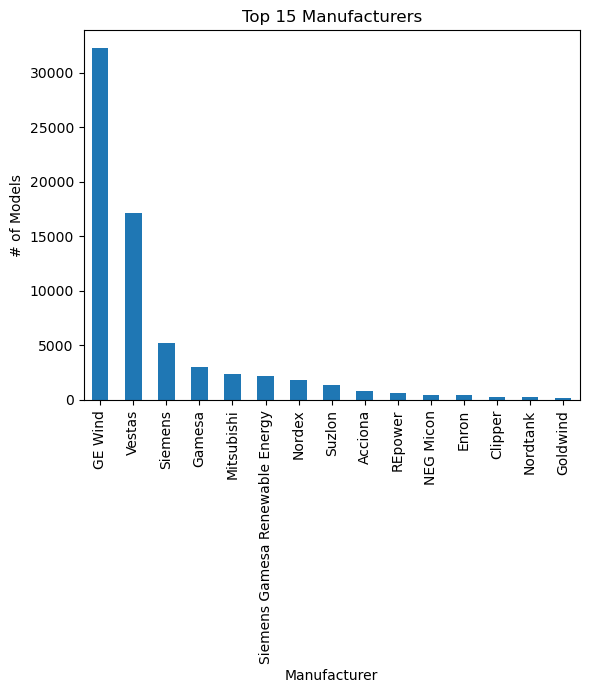

In [9]:
turbine_manu = wind_turbine_clean_df["Manufacturer"].value_counts().head(15)
turbine_manu

turbine_manu.plot(kind="bar")

plt.title ('Top 15 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('# of Models')

plt.show()

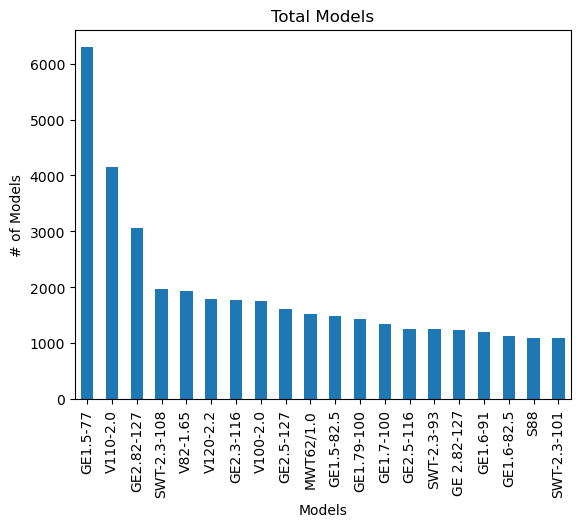

In [10]:
turbine_model = wind_turbine_clean_df["Model Number"].value_counts().head(20)
turbine_model

turbine_model.plot(kind="bar")

plt.title ('Total Models')
plt.xlabel('Models')
plt.ylabel('# of Models')

plt.show()

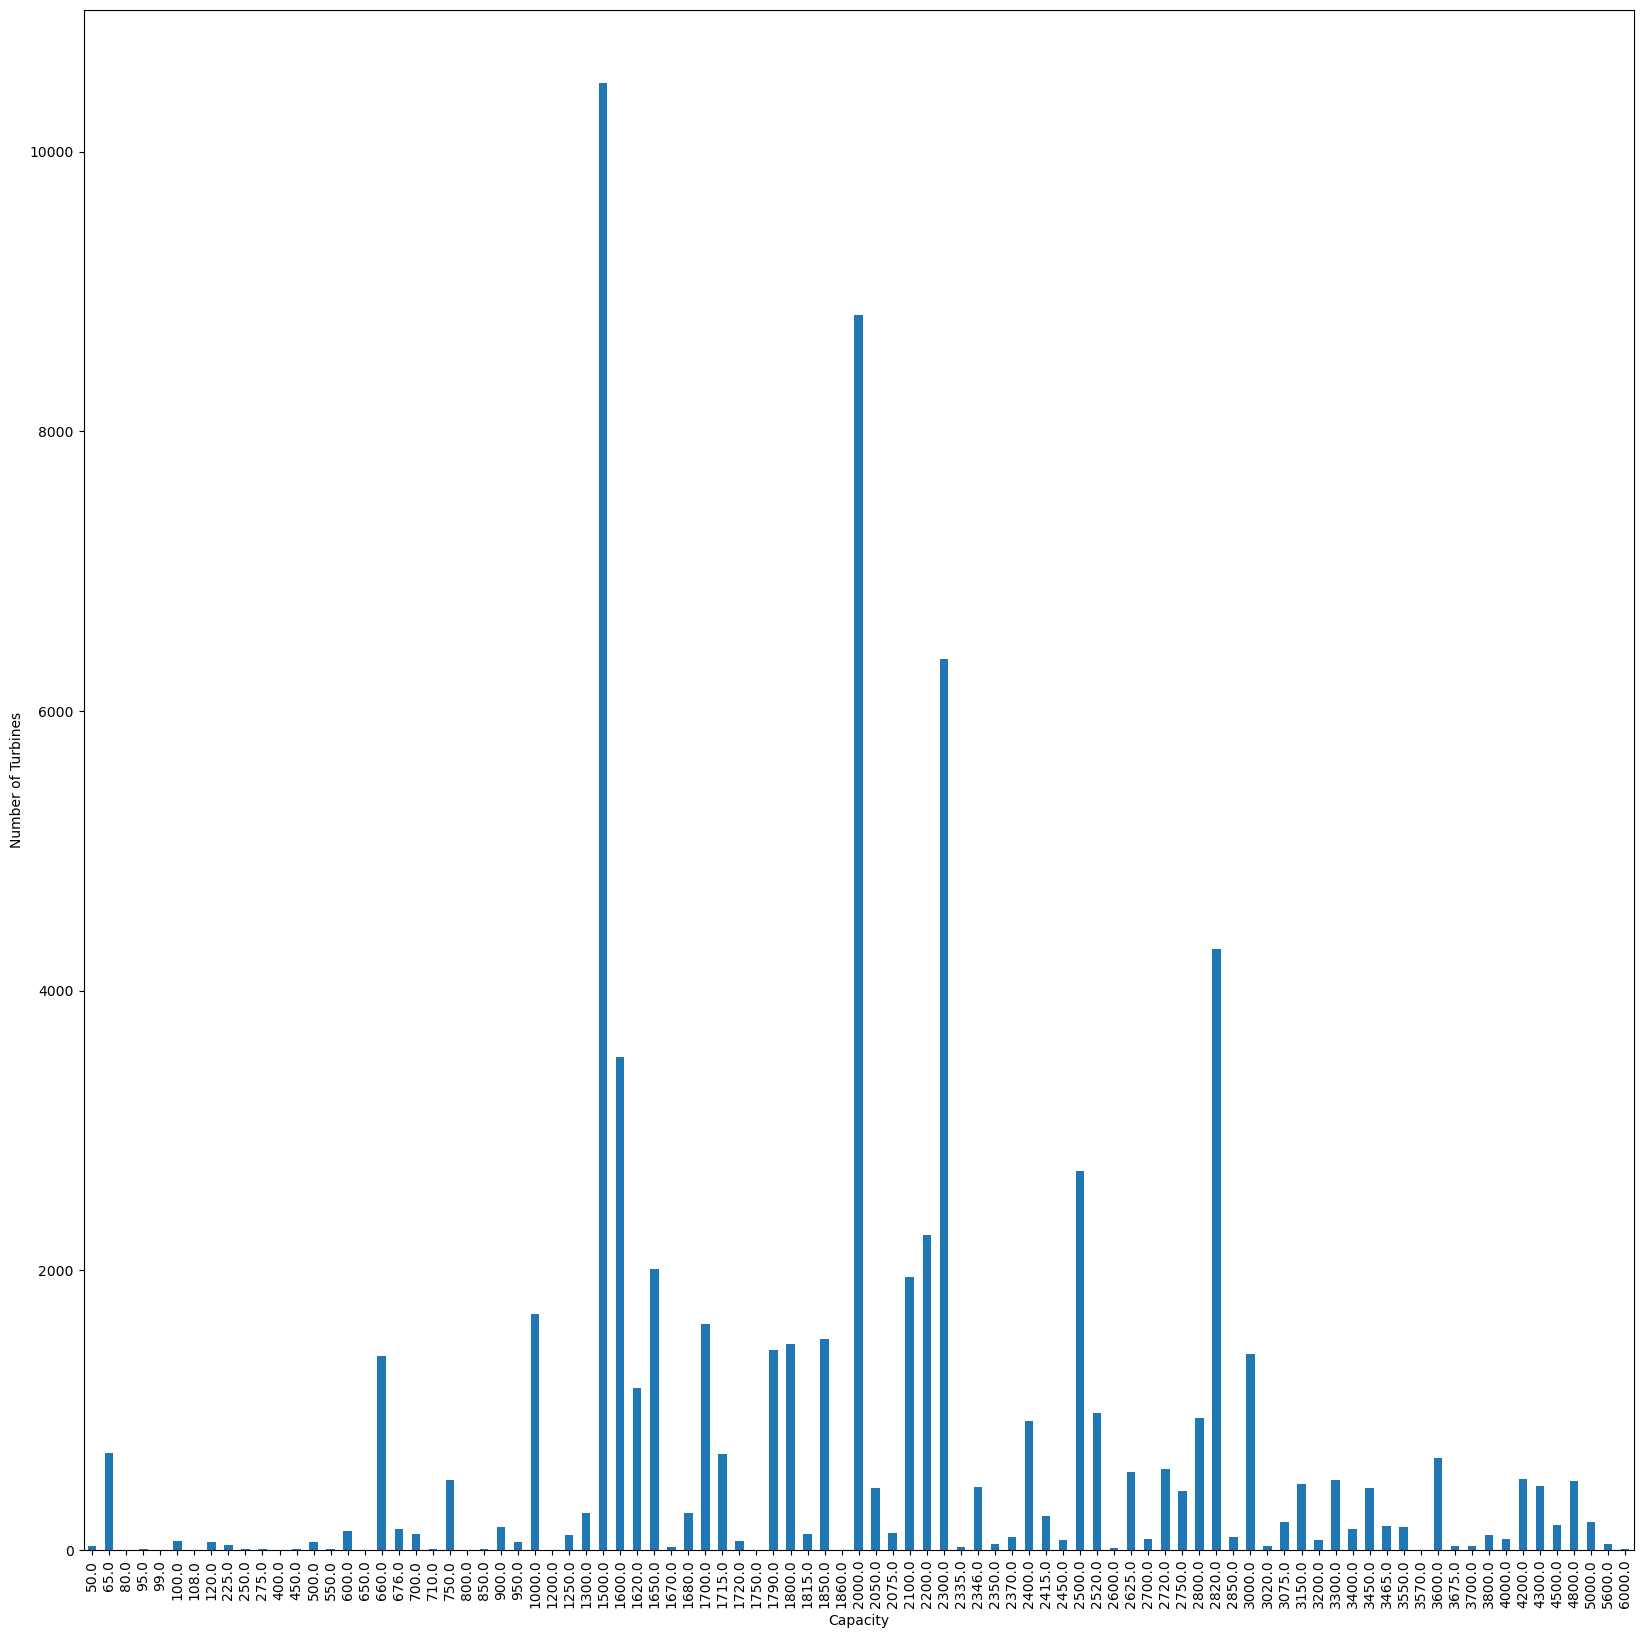

<Figure size 640x480 with 0 Axes>

In [11]:
turbine_cap = wind_turbine_clean_df.groupby(['Capacity'])
count_turbine = turbine_cap['Capacity'].count()
count_turbine

count_chart = count_turbine.plot(kind='bar', figsize=(20,20))

count_chart.set_xlabel("Capacity")
count_chart.set_ylabel("Number of Turbines")

plt.show()
plt.tight_layout()

GE Wind                                                                     32291
Vestas                                                                      17106
Siemens                                                                      5166
Gamesa                                                                       3037
Mitsubishi                                                                   2365
Siemens Gamesa Renewable Energy                                              2146
Nordex                                                                       1822
Suzlon                                                                       1316
Acciona                                                                       758
REpower                                                                       574
NEG Micon                                                                     433
Enron                                                                         396
Clipper         

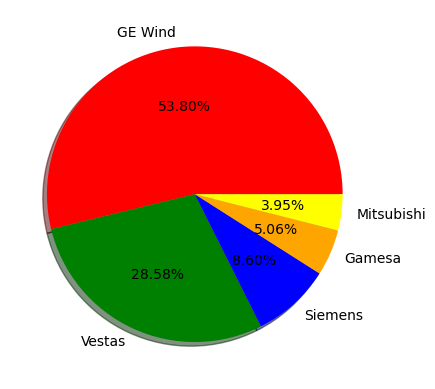

In [12]:
manu_pie = wind_turbine_clean_df['Manufacturer'].value_counts()
print(manu_pie)

labels = ["GE Wind", "Vestas", "Siemens","Gamesa", "Mitsubishi"]

sizes = [32300,17161,5166,3037,2373]

colors = ["red", "green","blue","orange","yellow"]

explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%0.2f%%", shadow=True)

plt.show()

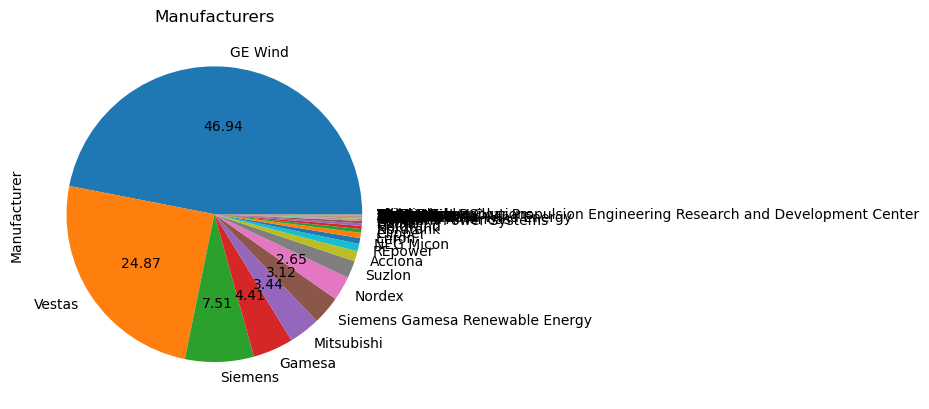

In [13]:
def autopct(pct): 
    return ('%.2f' % pct) if pct > 2 else ''


manu_data = wind_turbine_clean_df["Manufacturer"].value_counts()
manu_data.plot.pie(autopct= autopct)

plt.title("Manufacturers")
plt.show()

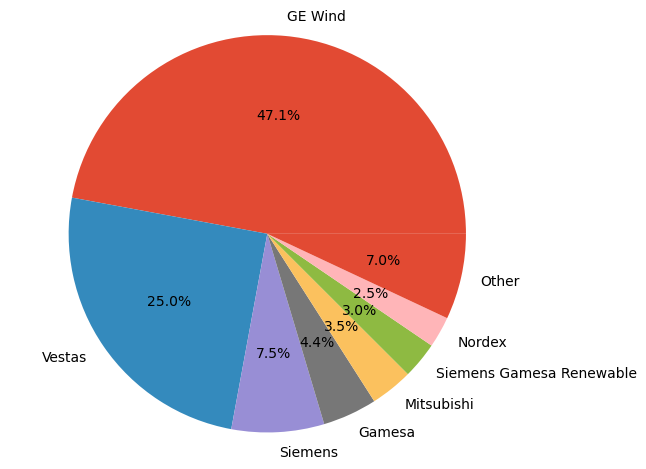

In [14]:
plt.style.use('ggplot')
dic = {'GE Wind': 46.63,
       'Vestas': 24.77,
       'Siemens': 7.46,
       'Gamesa': 4.38,
       'Mitsubishi': 3.43,
       'Siemens Gamesa Renewable': 2.950598782,
       'Nordex': 2.505121613,
       'Suzlon': 1.809407268,
       'Acciona': 1.042196587,
       'REpower': 1.09,
       'NEG Micon': 0.610468713,
       'Enron': 0.544472096 ,
       'Bonus': 0.419353508,
       'Clipper': 0.38360534 ,
       'Nordtank': 0.318983652,
       'Micon': 0.290110132,
       'Goldwind': 0.268111259,
       'Northern Power Systems': 0.134743094}
# group together all elements in the dictionary whose value is less than 1
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Other' if (dic[k]<2) else k):
     newdic[key] = sum([dic[k] for k in list(group)])
labels = newdic.keys()
sizes = newdic.values()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Turbines by State'}, xlabel='State', ylabel='Turbines'>

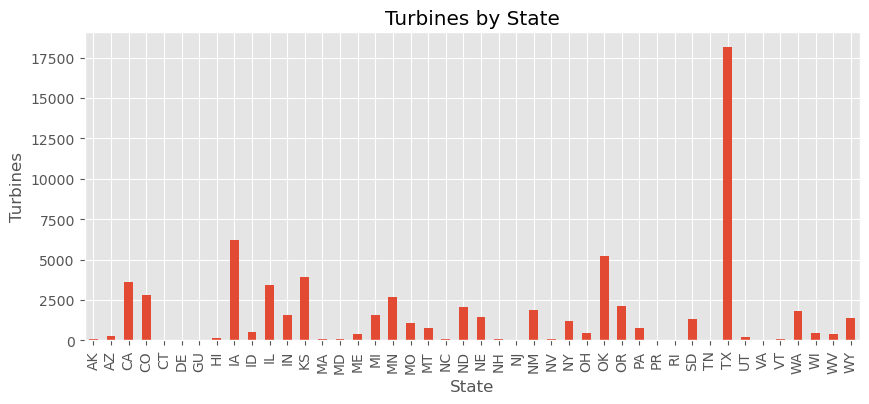

In [15]:
# Find turbines by state and plot the results
state_values = wind_turbine_clean_df.groupby(['State']).size()
state_values

state_values.plot(kind= 'bar', xlabel = 'State', ylabel ='Turbines', title = 'Turbines by State',  figsize=(10,4))

In [16]:
# Find all turbines by decade
eighties_turbines = wind_turbine_clean_df.loc[((wind_turbine_clean_df['Year'] >= 1980) &
                                                  (wind_turbine_clean_df['Year'] <= 1989))]                                                
nineties_turbines = wind_turbine_clean_df.loc[((wind_turbine_clean_df['Year'] >= 1990) &
                                                  (wind_turbine_clean_df['Year'] < 2000))] 
two_thousand_turbines = wind_turbine_clean_df.loc[((wind_turbine_clean_df['Year'] >= 2000) &
                                                  (wind_turbine_clean_df['Year'] < 2010))]
two_thousand_ten_turbines = wind_turbine_clean_df.loc[((wind_turbine_clean_df['Year'] >= 2010) &
                                                  (wind_turbine_clean_df['Year'] < 2020))]
two_thousand_twenty_turbines = wind_turbine_clean_df.loc[((wind_turbine_clean_df['Year'] >= 2021) &
                                                  (wind_turbine_clean_df['Year'] < 2024))]

In [17]:
# Get the average capacity for each decade
eighties_capacity_avg = eighties_turbines['Capacity'].mean()
nineties_capacity_avg = nineties_turbines['Capacity'].mean()
two_thousand_capacity_avg = two_thousand_turbines['Capacity'].mean()
two_thousand_ten_capacity_avg = two_thousand_ten_turbines['Capacity'].mean()
two_thousand_twenty_capacity_avg = two_thousand_twenty_turbines['Capacity'].mean() 

Text(450, 600, 'Avg Capacity= 71.77 kW')

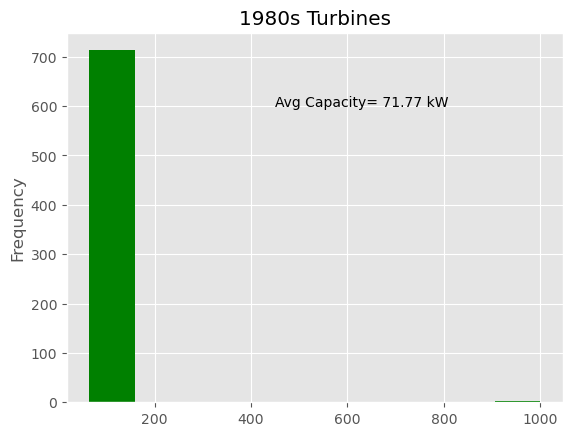

In [18]:
# Plot the turbine capacity for the 1980's
eighties_turbines['Capacity'].plot.hist(title = '1980s Turbines', color = 'green' )
avg_text = 'Avg Capacity= ' + str(round(eighties_capacity_avg,2)) + " kW"
plt.annotate(avg_text,(450, 600),fontsize=10,color="black")

Text(1000, 600, 'Avg Capacity= 700.07 kW')

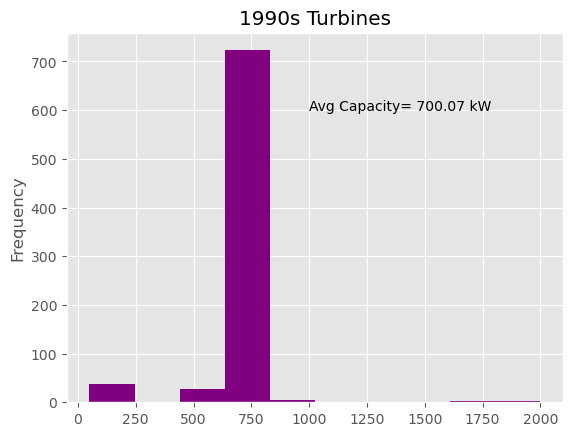

In [19]:
# Plot the turbine capacity for the 1990's
nineties_turbines['Capacity'].plot.hist(title = '1990s Turbines', color = 'purple')
avg_text = 'Avg Capacity= ' + str(round(nineties_capacity_avg,2)) + " kW"
plt.annotate(avg_text,(1000,600),fontsize=10,color="black")

Text(1570, 6000, 'Avg Capacity= 1573.01 kW')

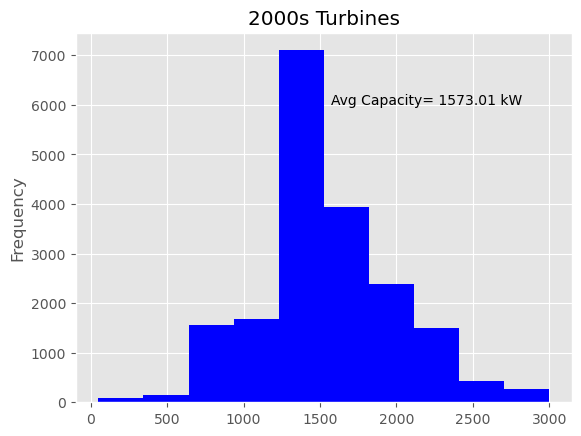

In [20]:
# Plot the turbine capacity for the 2000's
two_thousand_turbines['Capacity'].plot.hist(title = '2000s Turbines', color = 'blue')
avg_text = 'Avg Capacity= ' + str(round(two_thousand_capacity_avg,2)) + " kW"
plt.annotate(avg_text,(1570,6000),fontsize=10,color="black")

Text(2800, 12500, 'Avg Capacity= 2087.83 kW')

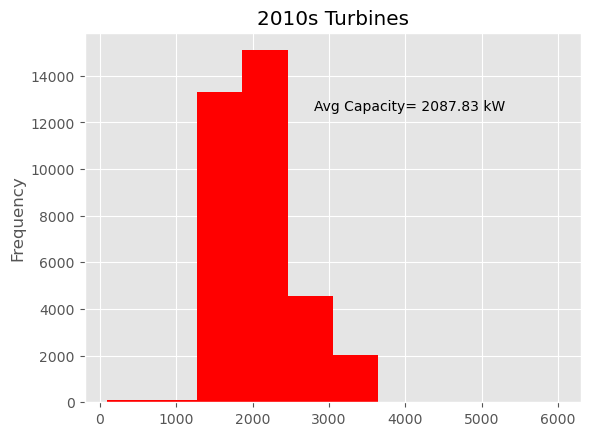

In [21]:
# Plot the turbine capacity for the 2010's
two_thousand_ten_turbines['Capacity'].plot.hist(title = '2010s Turbines', color = 'red')
avg_text = 'Avg Capacity= ' + str(round(two_thousand_ten_capacity_avg,2)) + " kW"
plt.annotate(avg_text,(2800,12500),fontsize=10,color="black")

Text(3500, 3000, 'Avg Capacity= 3091.8 kW')

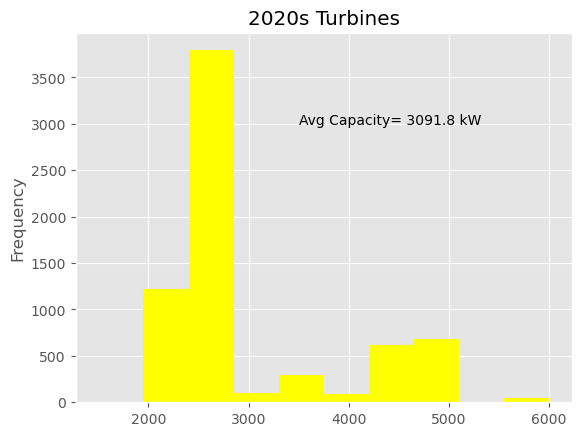

In [22]:
# Plot the turbine capacity for the 2020's
two_thousand_twenty_turbines['Capacity'].plot.hist(title = '2020s Turbines', color = 'yellow')
avg_text = 'Avg Capacity= ' + str(round(two_thousand_twenty_capacity_avg,2)) + " kW"
plt.annotate(avg_text,(3500,3000),fontsize=10,color="black")

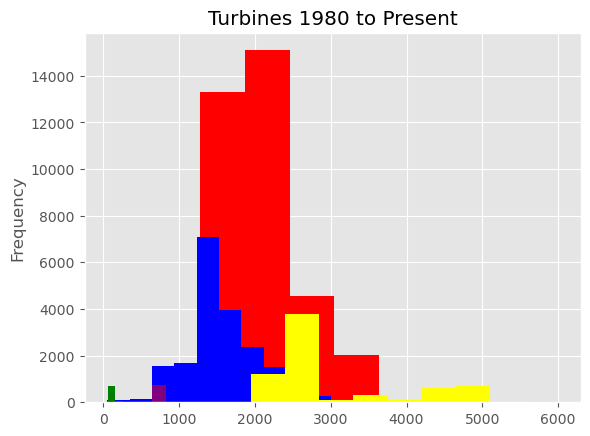

In [23]:
# Plot the turbine capacity for from 1980 to present
two_thousand_ten_turbines['Capacity'].plot.hist(color = 'red')
two_thousand_turbines['Capacity'].plot.hist(color = 'blue')
eighties_turbines['Capacity'].plot.hist(color = 'green' )
nineties_turbines['Capacity'].plot.hist(color = 'purple')
two_thousand_twenty_turbines['Capacity'].plot.hist(color = 'yellow')
plt.title('Turbines 1980 to Present')
plt.show()

The r-value is: 0.8799869024522995


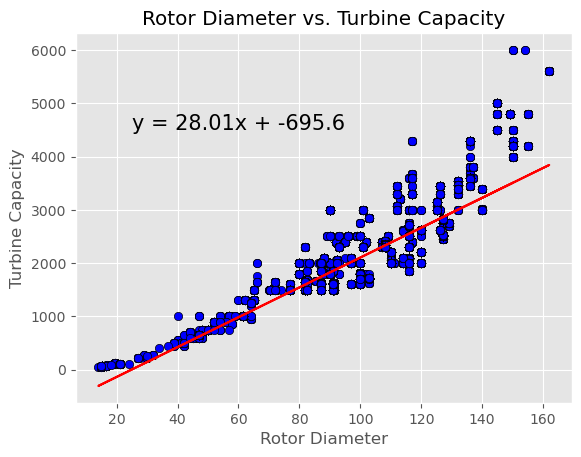

In [24]:
# Build scatter plot for rotor diameter vs. capacity
capacity = wind_turbine_clean_df['Capacity']
rotor_diameter = wind_turbine_clean_df['Rotor Diameter']
plt.scatter(rotor_diameter, capacity, edgecolors='black', c='blue')

# Plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(rotor_diameter, capacity)
regress_values = rotor_diameter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(25,4500),fontsize=15,color="black")
plt.plot(rotor_diameter,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Incorporate the other graph properties
plt.xlabel('Rotor Diameter')
plt.ylabel('Turbine Capacity')
plt.title('Rotor Diameter vs. Turbine Capacity')

# Show plot
plt.show()

The r-value is: 0.6986991970730823


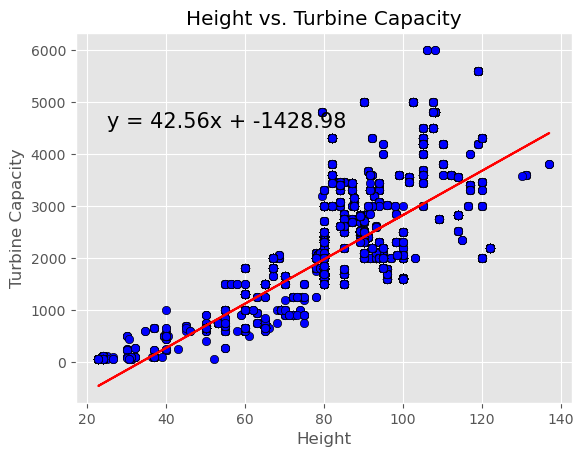

In [25]:
# Build scatter plot for rotor height vs. capacity
capacity = wind_turbine_clean_df['Capacity']
rotor_diameter = wind_turbine_clean_df['Height']
plt.scatter(rotor_diameter, capacity, edgecolors='black', c='blue')

# Plot the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(rotor_diameter, capacity)
regress_values = rotor_diameter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(25,4500),fontsize=15,color="black")
plt.plot(rotor_diameter,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Incorporate the other graph properties
plt.xlabel('Height')
plt.ylabel('Turbine Capacity')
plt.title('Height vs. Turbine Capacity')

# Show plot
plt.show()

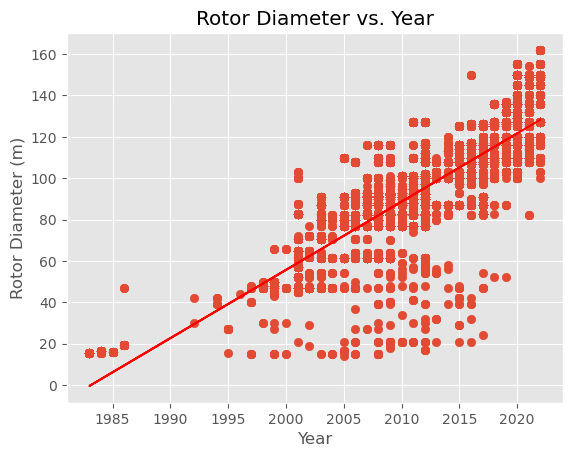

The trend from wind turbines across the United States indicates that average rotor diameter is increasing by 3.2993833092656906 meters each year.


In [26]:
x_axis = wind_turbine_clean_df['Year']
y_axis = wind_turbine_clean_df['Rotor Diameter']

plt.scatter(x_axis, y_axis)
plt.xlabel("Year")  # add X-axis label
plt.ylabel("Rotor Diameter (m)")  # add Y-axis label
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.plot(x_axis,regress_values,"r-")
plt.title("Rotor Diameter vs. Year") 
plt.show()

print(f"The trend from wind turbines across the United States indicates that average rotor diameter is increasing by {slope} meters each year.")


In [27]:
gewind_turbines = wind_turbine_clean_df.loc[wind_turbine_clean_df['Manufacturer'] == 'GE Wind', "Capacity"] 
print(f"GE Wind Average Capacity: {gewind_turbines.mean()}")


vestas_turbines = wind_turbine_clean_df.loc[wind_turbine_clean_df['Manufacturer'] == 'Vestas', "Capacity"] 
print(f"Vestas Average Capacity: {vestas_turbines.mean()}")

siemens_turbines = wind_turbine_clean_df.loc[wind_turbine_clean_df['Manufacturer'] == 'Siemens', "Capacity"] 
print(f"Siemens Average Capacity: {siemens_turbines.mean()}")

gamesa_turbines = wind_turbine_clean_df.loc[wind_turbine_clean_df['Manufacturer'] == 'Gamesa', "Capacity"] 
print(f"Gamesa Average Capacity: {gamesa_turbines.mean()}")

mitsubishi_turbines = wind_turbine_clean_df.loc[wind_turbine_clean_df['Manufacturer'] == 'Mitsubishi', "Capacity"] 
print(f"Mitsubishi Average Capacity: {mitsubishi_turbines.mean()}")

GE Wind Average Capacity: 1988.718373540615
Vestas Average Capacity: 2166.251023032854
Siemens Average Capacity: 2340.227255129694
Gamesa Average Capacity: 1855.1168916694105
Mitsubishi Average Capacity: 1329.9788583509514


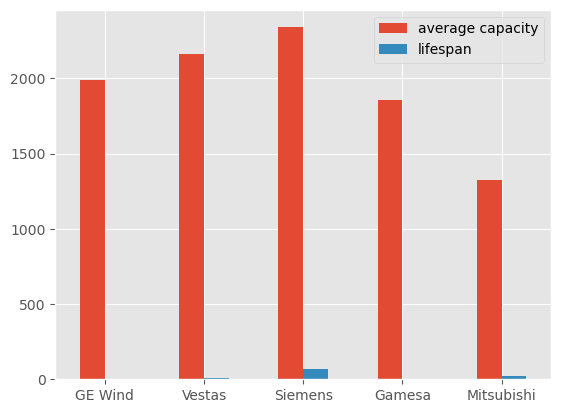

In [28]:
average_capacity = [1989, 2160, 2340, 1855, 1326]
lifespan = [2, 8, 70, 1.5, 25]
index = ['GE Wind', 'Vestas', 'Siemens',
         'Gamesa', 'Mitsubishi']

df = pd.DataFrame({'average capacity': average_capacity,

                   'lifespan': lifespan}, index=index)

ax = df.plot.bar(rot=0)

In [29]:
base_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&t_state=eq.AZ"
response = requests.get(base_url)
data = response.json()

# Print to see data returned
# print(data)  

latitudes = []
longitudes = []

# Loop to extract latitudes and longitudes
for item in data:
    ylat = item['ylat']
    xlong = item['xlong']
    latitudes.append(ylat)
    longitudes.append(xlong)

# DataFrame with latitude and longitude information
az_wind_location_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

In [30]:
# Configure the map plot_2
map_plot_az = az_wind_location_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "red",  
)

# Display the map plot
map_plot_az

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [31]:
base_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&t_state=eq.CA"
response = requests.get(base_url)
data = response.json()

# Print to see data returned
# print(data)  

latitudes = []
longitudes = []

# Loop to extract latitudes and longitudes
for item in data:
    ylat = item['ylat']
    xlong = item['xlong']
    latitudes.append(ylat)
    longitudes.append(xlong)

# DataFrame with latitude and longitude information
ca_wind_location_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

In [32]:
map_plot_ca = ca_wind_location_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "red",  
)

# Display the map plot
map_plot_ca

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [33]:
base_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&t_state=eq.TX"
response = requests.get(base_url)
data = response.json()

# Print to see data returned
# print(data)  

latitudes = []
longitudes = []

# Loop to extract latitudes and longitudes
for item in data:
    ylat = item['ylat']
    xlong = item['xlong']
    latitudes.append(ylat)
    longitudes.append(xlong)

# DataFrame with latitude and longitude information
tx_wind_location_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

In [34]:
map_plot_tx = tx_wind_location_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "red",  
)

# Display the map plot
map_plot_tx

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [35]:
base_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&t_state=eq.OK"
response = requests.get(base_url)
data = response.json()

# Print to see data returned
# print(data)  

latitudes = []
longitudes = []

# Loop to extract latitudes and longitudes
for item in data:
    ylat = item['ylat']
    xlong = item['xlong']
    latitudes.append(ylat)
    longitudes.append(xlong)

# DataFrame with latitude and longitude information
ok_wind_location_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

In [36]:
map_plot_ok = ok_wind_location_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "red",  
)

# Display the map plot
map_plot_ok

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [37]:
base_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&t_state=eq.IA"
response = requests.get(base_url)
data = response.json()

# Print to see data returned
# print(data)  

latitudes = []
longitudes = []

# Loop to extract latitudes and longitudes
for item in data:
    ylat = item['ylat']
    xlong = item['xlong']
    latitudes.append(ylat)
    longitudes.append(xlong)

# DataFrame with latitude and longitude information
ia_wind_location_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

In [38]:
map_plot_ia = ia_wind_location_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "red",  
)

# Display the map plot
map_plot_ia

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]